# Date of transfer

In [9]:
# Import
import pyarrow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import dates
from scipy.stats import gaussian_kde
import seaborn as sns

In [10]:
# Load
df = pd.read_parquet('data/outliers.parquet', engine='pyarrow')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22177887 entries, 0 to 22177886
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   price             int64         
 1   date_of_transfer  datetime64[ns]
 2   property_type     object        
 3   is_new            bool          
 4   duration          object        
 5   city              object        
 6   district          object        
 7   county            object        
 8   ppdcategory_type  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 1.3+ GB


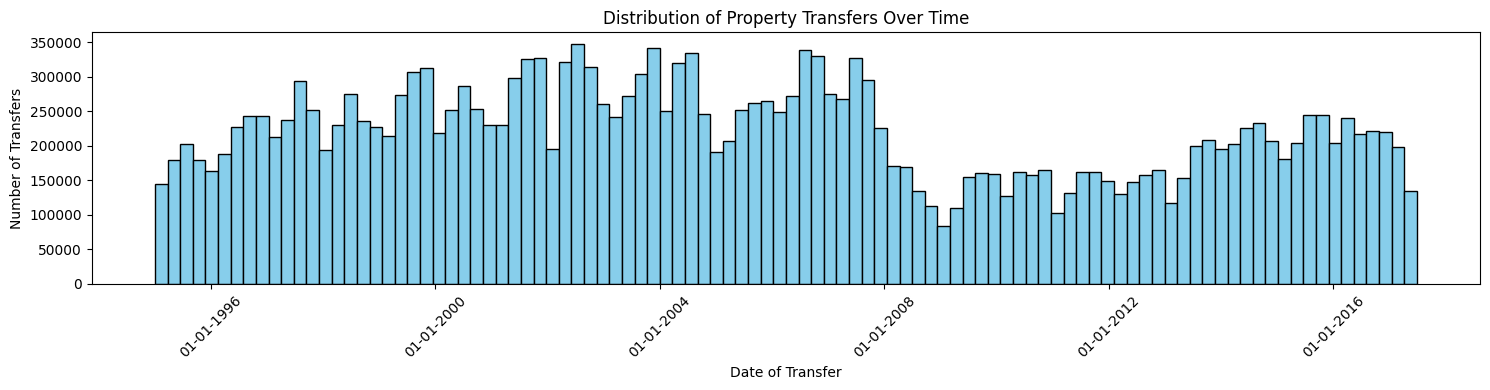

In [12]:
# Distribution of 'date_of_transfer'
plt.figure(figsize=(15, 4))

# Create the histogram
plt.hist(df['date_of_transfer'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Transfers Over Time')
plt.xlabel('Date of Transfer')
plt.ylabel('Number of Transfers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format dates on x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

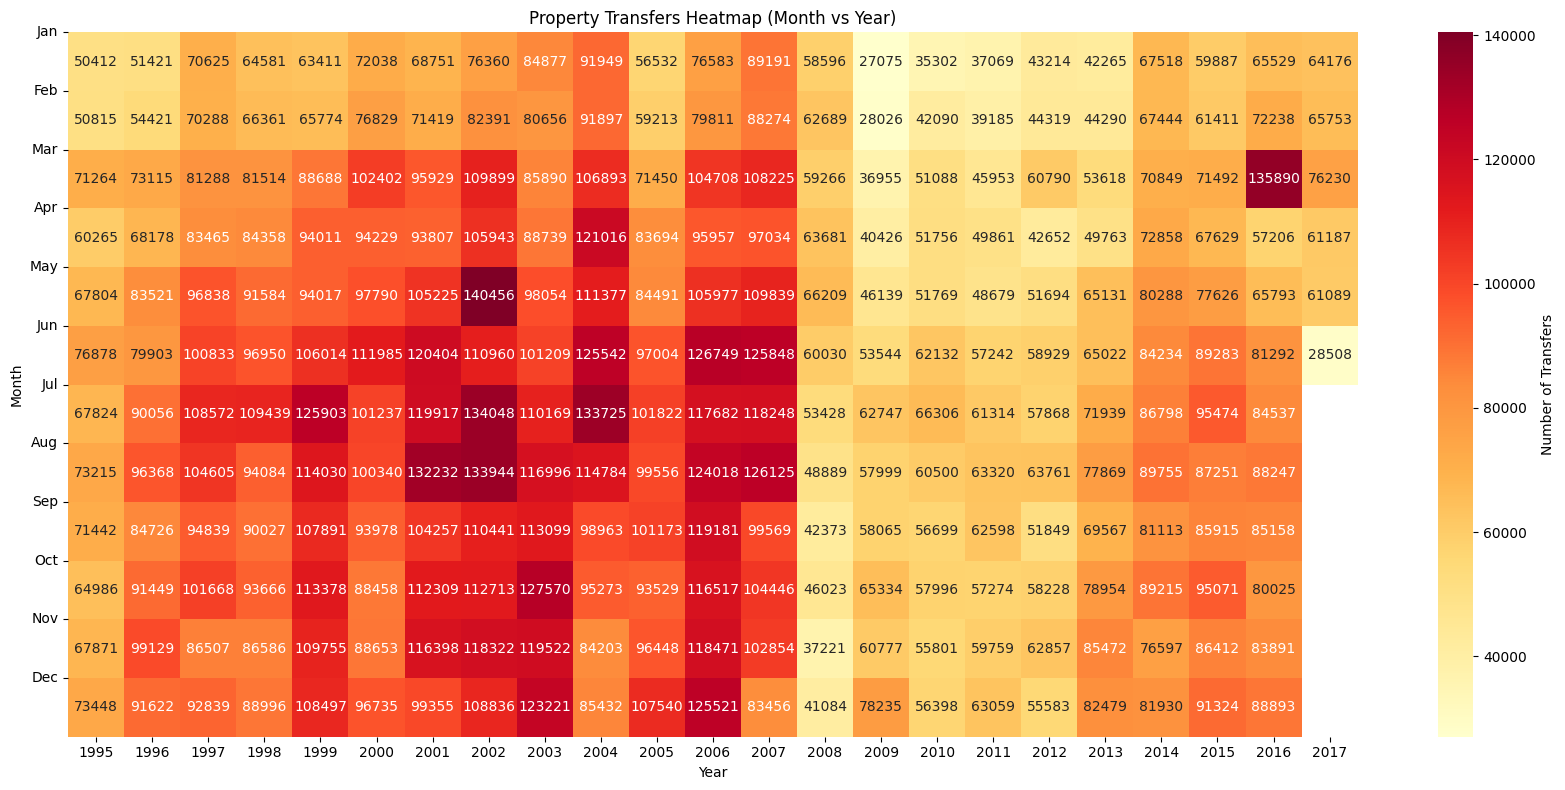

In [13]:
heatmap_df = pd.DataFrame()
heatmap_df['index'] = df.index
heatmap_df['year'] = df['date_of_transfer'].dt.year
heatmap_df['month'] = df['date_of_transfer'].dt.month

# Create a pivot table
pivot_table = heatmap_df.pivot_table(
    values='index',
    index='month',
    columns='year',
    aggfunc='count'
)

plt.figure(figsize=(17, 8))
sns.heatmap(pivot_table, 
            annot=True,  # Show values in cells
            fmt='.0f',
            cmap='YlOrRd',  # Color scheme
            cbar_kws={'label': 'Number of Transfers'})

plt.title('Property Transfers Heatmap (Month vs Year)')
plt.xlabel('Year')
plt.ylabel('Month')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(range(0, 12), month_names, rotation=0)

plt.tight_layout()
plt.show()

### Global Financial Crisis (GFC)
The UK housing market in 2008 was profoundly affected by the GFC. This caused a  sharp drop in transactions

### March 2016
The period from March to April 2016 in the UK housing market was marked by a surge in activity in March due to the rush to beat the new stamp duty surcharge, followed by a sharp slowdown in April as the policy took effect.

Property transactions jumped significantly in March 2016. According to HM Revenue and Customs (HMRC), residential property transactions rose by approximately 80% compared to the previous month due to the pre-stamp duty rush.

In [14]:
# dataset after 2008 DFC
cutoff_date = pd.to_datetime('2009-01-01')
df_2008 = df[df['date_of_transfer'] >= cutoff_date]
df_2008 = df_2008.reset_index(drop=True)

# Save data in parquet format
print(df_2008.info())
df_2008.to_parquet('data/after_2008_crisis.parquet', engine='pyarrow')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609601 entries, 0 to 6609600
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   price             int64         
 1   date_of_transfer  datetime64[ns]
 2   property_type     object        
 3   is_new            bool          
 4   duration          object        
 5   city              object        
 6   district          object        
 7   county            object        
 8   ppdcategory_type  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 409.7+ MB
None


In [16]:
# dataset after April 2016 policy
cutoff_date = pd.to_datetime('2016-04-01')
df_2016 = df[df['date_of_transfer'] >= cutoff_date]
df_2016 = df_2016.reset_index(drop=True)

# Save data in parquet format
print(df_2016.info())
df_2016.to_parquet('data/after_2016_policy.parquet', engine='pyarrow')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071985 entries, 0 to 1071984
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   price             1071985 non-null  int64         
 1   date_of_transfer  1071985 non-null  datetime64[ns]
 2   property_type     1071985 non-null  object        
 3   is_new            1071985 non-null  bool          
 4   duration          1071985 non-null  object        
 5   city              1071985 non-null  object        
 6   district          1071985 non-null  object        
 7   county            1071985 non-null  object        
 8   ppdcategory_type  1071985 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 66.5+ MB
None
